In [1]:
from IPython.display import HTML

HTML('''
<script>
function toggleOutput(cell) {
    var output_area = cell.querySelector('.output');
    if (output_area.style.display === 'none') {
        output_area.style.display = '';
    } else {
        output_area.style.display = 'none';
    }
}

document.querySelectorAll('.cell').forEach(function(cell) {
    let btn = document.createElement('button');
    btn.innerHTML = 'Hide/Show Output';
    btn.style.margin = '5px';
    btn.onclick = function() { toggleOutput(cell); };
    cell.insertBefore(btn, cell.firstChild);
});
</script>
''')


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\train'
val_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\val'
test_dir = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test'

img_height, img_width = 128, 128
batch_size = 32
num_classes = 2  # fire ve nofire

# Veri artırma (augmentasyon)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validasyon  
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generatorlar
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # 2 sınıf için
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# CNN modeli
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
model.save('fire_detection_cnn_model.h5')


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.
Epoch 1/15
 7/59 [==>...........................] - ETA: 4:53 - loss: 0.7499 - accuracy: 0.5402

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


40/59 [===================>..........] - ETA: 1:41 - loss: 0.6321 - accuracy: 0.6224

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 374s 6s/step - loss: 0.6235 - accuracy: 0.6338 - val_loss: 0.5539 - val_accuracy: 0.6891
Epoch 2/15
59/59 [==============================] - 349s 6s/step - loss: 0.5135 - accuracy: 0.7483 - val_loss: 0.4990 - val_accuracy: 0.7438
Epoch 3/15
59/59 [==============================] - 354s 6s/step - loss: 0.5137 - accuracy: 0.7483 - val_loss: 0.4664 - val_accuracy: 0.7761
Epoch 4/15
59/59 [==============================] - 348s 6s/step - loss: 0.4779 - accuracy: 0.7695 - val_loss: 0.5023 - val_accuracy: 0.7239
Epoch 5/15
59/59 [==============================] - 365s 6s/step - loss: 0.4571 - accuracy: 0.7843 - val_loss: 0.4699 - val_accuracy: 0.7587
Epoch 6/15
59/59 [==============================] - 388s 7s/step - loss: 0.4355 - accuracy: 0.7954 - val_loss: 0.5134 - val_accuracy: 0.7388
Epoch 7/15
59/59 [==============================] - 348s 6s/step - loss: 0.4545 - accuracy: 0.7854 - val_loss: 0.4325 - val_accuracy: 0.7687
Epoch 8/15
59/59 [======

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 6/13 [============>.................] - ETA: 28s - loss: 0.7470 - accuracy: 0.5625

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 67s 5s/step - loss: 0.4453 - accuracy: 0.7659
Test Loss: 0.4453
Test Accuracy: 0.7659


 5/13 [==========>...................] - ETA: 28s

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 6/13 [============>.................] - ETA: 30s

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 66s 5s/step


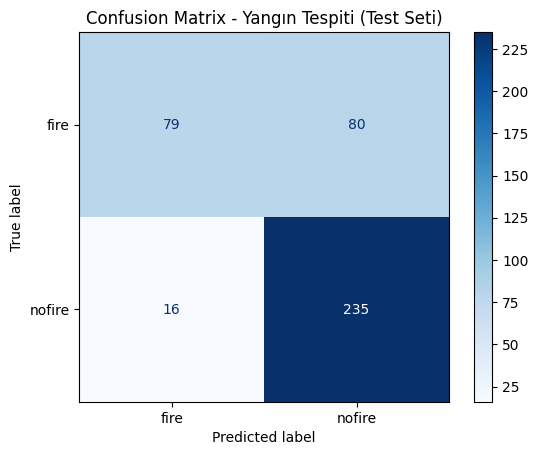

Sınıflandırma Raporu:

              precision    recall  f1-score   support

        fire       0.83      0.50      0.62       159
      nofire       0.75      0.94      0.83       251

    accuracy                           0.77       410
   macro avg       0.79      0.72      0.73       410
weighted avg       0.78      0.77      0.75       410



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Sınıf isimleri
class_names = list(test_generator.class_indices.keys())

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Gerçek etiketler
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Yangın Tespiti (Test Seti)")
plt.show()

print("Sınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 [==============================] - 0s 55ms/step


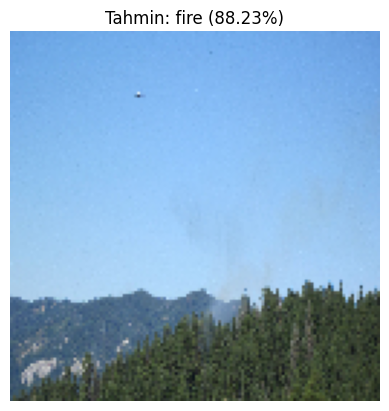

1/1 [==============================] - 0s 23ms/step


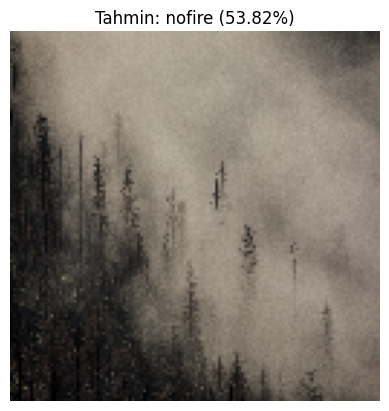

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import random

model = load_model('fire_detection_cnn_model.h5')
class_names = ['fire', 'nofire']  

# Tahmin fonksiyonu
def predict_image(img_path, model, class_names, img_height=128, img_width=128):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Görselleştirme
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Tahmin: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

img_path = r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test\fire\20960888741_8c4be2c1df_o.jpg'
img_path1= r'C:\Users\Admin\Desktop\yangın_tespiti\archive (5)\the_wildfire_dataset_2n_version\test\nofire\45636031272_8408d32834_o.jpg'

predict_image(img_path, model, class_names)
predict_image(img_path1, model, class_names)


In [3]:
pip install tensorflow==2.12.0 protobuf==3.20.3


  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ---------------------------------------- 0.0/904.0 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/904.0 kB ? eta -:--:--
   ---------------------------------- ----- 786.4/904.0 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 904.0/904.0 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/272.8 MB ? eta -:--:--
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.7 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice

   ------------------- ------------------- 133.2/272.8 MB 78.6 kB/s eta 0:29:38
   ------------------- ------------------- 133.2/272.8 MB 78.6 kB/s eta 0:29:38
   ------------------- ------------------- 133.2/272.8 MB 78.6 kB/s eta 0:29:38
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- ------------------- 133.4/272.8 MB 78.6 kB/s eta 0:29:34
   ------------------- -----------------

In [4]:
!pip install protobuf==3.20.*
!pip install --upgrade tensorflow



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   -------------------

ERROR: Could not install packages due to an OSError: [WinError 32] Dosya başka bir işlem tarafından kullanıldığından bu işlem dosyaya erişemiyor: 'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-unpack-k35qa14l\\tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ------------------------------------- 18.1/332.0 MB 65.5 kB/s eta 1:19:56
   -- ----------------------------------

In [2]:
pip uninstall tensorflow protobuf -y


Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
